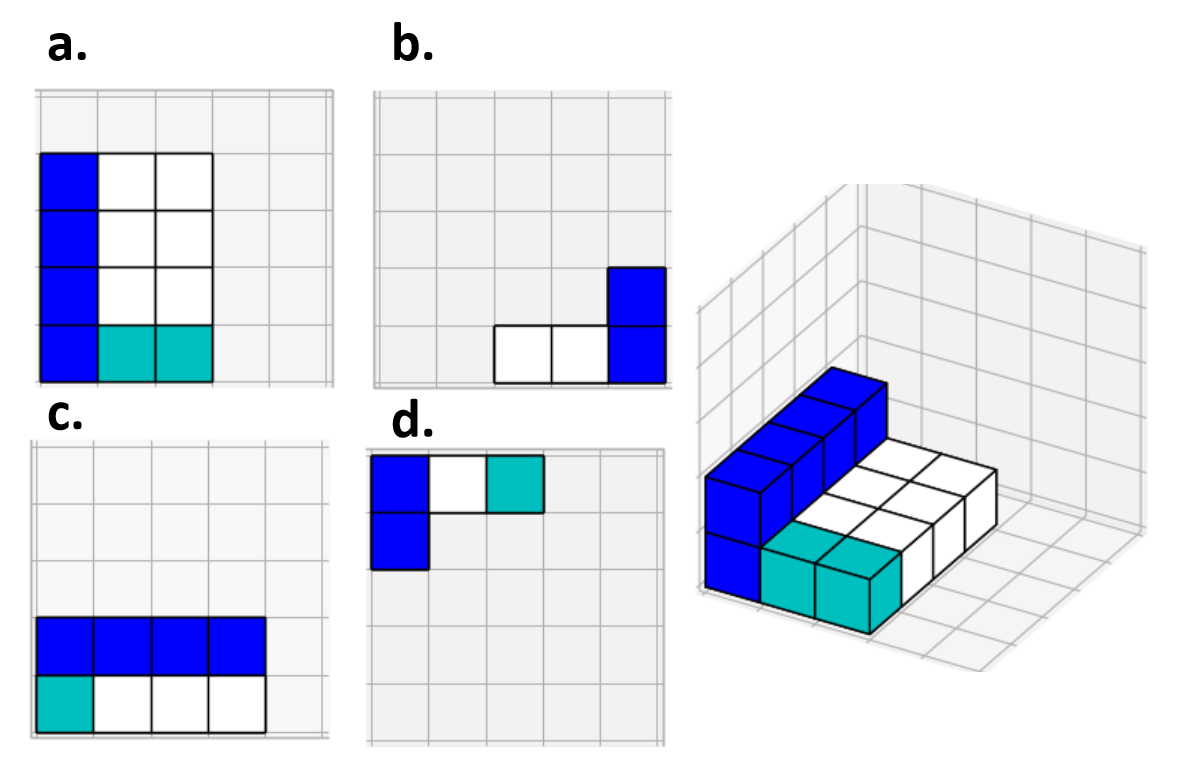

In [ ]:
#Part1: import 
#a.
from IPython.display import display, Image, clear_output
import time
 
#b. for saving data in google form
import requests
from bs4 import BeautifulSoup
import json
import time
def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok
    
#c. for saving data in disk by using panda
import pandas as pd
import os

#d. for using button 
import time
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from jupyter_ui_poll import ui_events

event_info = {
    'type': '',
    'description': '',
    'time': -1
}

def wait_for_event(timeout=-1, interval=0.001, max_rate=20, allow_interupt=True):    
    start_wait = time.time()

    event_info['type'] = ""
    event_info['description'] = ""
    event_info['time'] = -1

    n_proc = int(max_rate*interval)+1
    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            
            ui_poll(n_proc)

            if (timeout != -1) and (time.time() > start_wait + timeout):
                keep_looping = False
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
            time.sleep(interval)
    return event_info

def register_event(btn):
    event_info['type'] = "click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return

#Part 2: quiz

#a. contract about collecting data
data_consent_info = """DATA CONSENT INFORMATION:
Please read:
we wish to record your response data
to an anonymised public data repository. 
Your data will be used for educational teaching purposes
practising data analysis and visualisation.
Please type   yes   in the box below if you consent to the upload."""

print(data_consent_info)
result = input("> ").lower() 
if result == "yes": 
    print("Thanks for your participation.")
    print("Please contact philip.lewis@ucl.ac.uk")
    print("If you have any questions or concerns")
    print("regarding the stored results.")
    
else: 
    raise(Exception("User did not consent to continue test."))

#b. quiz introduction
print("Welcome to the spatial reasoning test")
print("plz identify an 2D projection which cannot be made by rotating this arrangement in space, \nThere are 10 questions in total!")
time.sleep(6)
clear_output(wait=False)

id_instructions = """
Enter your anonymised ID
To generate an anonymous 4-letter unique user identifier please enter:
- two letters based on the initials (first and last name) of a childhood friend
- two letters based on the initials (first and last name) of a favourite actor / actress
e.g. if your friend was called Charlie Brown and film star was Tom Cruise
     then your unique identifer would be CBTC
"""
print(id_instructions)
username = input("> ").upper()
print("User entered id:", username)
clear_output(wait=False)

print('Are you male or female?')
username_gender = input(">").lower()
clear_output(wait=False)

print('How old are you?')
username_age= input("> ")
clear_output(wait=False)

print('Have you drunk any alcoholic beverages in the last 24h? plz answer yes or no')
username_answer= input('>').lower()
clear_output(wait=False)

print("Lets start the quiz", username)
time.sleep(2)
clear_output(wait=False)
#c. quiz start
pic1 = Image('cube1.png', width=500)
pic2 = Image('cube2.png', width=500)
pic3 = Image('cube8.png', width=500)
pic4 = Image('cube7.png', width=500)
pic5 = Image('cube5.png', width=500)
pic6 = Image('cube9.png', width=500)
pic7 = Image('cube10.png', width=500)
pic8 = Image('cube6.png', width=500)
pic9 = Image('cube4.png', width=500)
pic10 = Image('cube3.png', width=500)

picture_list=[pic1,pic2,pic3,pic4,pic5,pic6,pic7,pic8,pic9,pic10]
answer_list=['d','b','b','d','d','d','a','c','b','d']
start_time=time.time()
time_limit = 180
score=0
user_data = []
answer_each = []

for i in range(len(answer_list)):
    
    btn1 = widgets.Button(description="a")
    btn2 = widgets.Button(description="b")
    btn3 = widgets.Button(description="c")
    btn4 = widgets.Button(description="d")
    
    btn1.on_click(register_event) 
    btn2.on_click(register_event) 
    btn3.on_click(register_event) 
    btn4.on_click(register_event) 
    
    myhtml1 = HTML("<h3>Which imgae can't get by rotating?</h3>")
    display(myhtml1)
    myhtml2 = HTML("<h4>Plz answer as accurately as possible </h4")
    display(myhtml2)
    
    display(picture_list[i])

    panel = widgets.HBox([btn1, btn2, btn3,btn4])
    display(panel)
    result = wait_for_event(interval=1)
    clear_output()

    elapsed_time = time.time() - start_time
    if elapsed_time > time_limit:
        print("Time up. Quiz terminated.")
        break

    if result['description']== answer_list[i]:
        print('Well done!')
        time.sleep(2)
        score = score + 1 
        score_each = 1

    else:
        print('Wrong!')
        print('Have a cup of coffee to wake!')
        time.sleep(2)
        score_each = 0

    answer_each.append(score_each)
    clear_output(wait=False)
   
   

end_time = time.time()
time_taken = end_time - start_time

print("Quiz over",username)
print(f"You got {score} out of 10")
print(f"You have used in total {time_taken:.2f} seconds to complete your test.")

#Part3: store data

#a. save data in google form
data_dict = {'name': username,
             'age' : username_age,
             'gender':username_gender,
             'alcoholic beverage' : username_answer,
             'grade': score,
             'time' : time_taken}
for i in range(1, 11): 
    key = f'answer_{i}'
    if i <= len(answer_each):
        data_dict[key] = answer_each[i - 1]
    else:
        data_dict[key] = 'Not Answered'
form_url = "https://docs.google.com/forms/d/e/1FAIpQLSey3_gng-x5AonNld3n1spZdtdHIMMSiXfYjJr2dF7YwYJJUw/viewform?usp=sf_link"   
send_to_google_form(data_dict, form_url)

#b. save data in disk(using panda)
user_data.append(data_dict)
if os.path.exists('quiz_results.csv'):
    existing_data = pd.read_csv('quiz_results.csv')
    user_data = user_data + existing_data.to_dict(orient='records')
    df = pd.DataFrame(user_data)
    df.to_csv('quiz_results.csv', index=False)
